# Module Import

In [1]:
import numpy as np
import pandas as pd
import openpyxl

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# Define Function

In [2]:
# encoder 함수 지정
def encoder(data, kind):
    # 범주형 변수와 수치형 변수를 분리
    cat_features = data.select_dtypes(include=['object']).columns.to_list()
    num_features = data.select_dtypes(exclude='object').columns.to_list() 
    if kind == 'onehot':
        # 원핫인코딩
        data_cat = pd.get_dummies(data[cat_features])
        data = pd.concat([data,data_cat],axis=1).drop(columns=[f for f in cat_features])
        return data
    elif kind == 'label':
        # 라벨인코딩
        for c in cat_features:
            data[c]=pd.Categorical(data[c]).codes
        return data
    else:
        print('choose "onehot"or "label"')

# Data Load

In [3]:
data = pd.read_excel('../data/unboundi.xlsx')
data

,예약번호,미리예약,업체코드,업체명,상품,객실타입,예약일시,투숙일,퇴실일,회원구분,...,결제수단,판매금액,결제금액,쿠폰명,쿠폰금액,포인트금액,제휴사할인금액,상태,유입,경로
0,2106130002630231,Y,1000108371,평창 고려궁 한옥호텔,숙박,언바운디(힐링PKG),2021-06-13 00:02:53,2021-06-13,2021-06-14,회원,...,MOBILE,300000,295000,NaN,0,0,5000,예약완료,NaN,APP_Y
1,2106132217620128,Y,1000108371,평창 고려궁 한옥호텔,연박,언바운디(힐링PKG),2021-06-13 22:17:24,2021-08-01,2021-08-04,회원,...,NAVERPAY,1110000,1105000,NaN,0,0,5000,고객취소,NaN,APP_Y
2,2106141854010209,Y,1000108371,평창 고려궁 한옥호텔,연박,언바운디(힐링PKG),2021-06-14 18:54:43,2021-06-30,2021-07-03,회원,...,CARD,900000,900000,NaN,0,0,0,고객취소,NaN,APP_Y
3,2106141922010134,Y,1000108371,평창 고려궁 한옥호텔,연박,언바운디(힐링PKG),2021-06-14 19:22:51,2021-06-30,2021-07-03,회원,...,CARD,900000,900000,NaN,0,0,0,고객취소,NaN,APP_Y
4,2106161564686605,Y,1000108371,평창 고려궁 한옥호텔,연박,언바운디(힐링PKG),2021-06-16 15:15:02,2021-06-25,2021-06-27,비회원,...,OTA,620000,620000,NaN,0,0,0,고객취소,NaN,WL_SBLUEVERY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,2202031246020158,Y,10041118,라까사호텔 광명,숙박,DELUXE WALNUT DOUBLE(UNBOUNDI 힐링PKG),2022-02-03 12:46:50,2022-02-05,2022-02-06,회원,...,NAVERPAY,255000,250000,NaN,0,0,5000,예약완료,NaN,APP_Y
406,2202031300380215,Y,10041118,라까사호텔 광명,숙박,STANDARD DOUBLE(UNBOUNDI 커플뷰티PKG),2022-02-03 13:00:56,2022-02-14,2022-02-15,회원,...,CARD,150000,150000,NaN,0,0,0,고객취소,NaN,APP_Y
407,2202051162241998,N,1000113591,광안리 스튜디오202,숙박,UNBOUNDI 스탠다드A(힐링뷰티 PKG),2022-02-05 11:28:39,2022-02-05,2022-02-06,비회원,...,OTA,150000,150000,NaN,0,0,0,예약완료,NaN,WL_ETBS
408,2202051733280283,Y,1000111730,서귀포 일레인 호텔,숙박,언바운디 디럭스 킹(UNBOUNDI 웰니스 오감테라피PKG),2022-02-05 17:33:43,2022-02-06,2022-02-07,회원,...,KAKAOPAY,99000,94000,2월게하선착순쿠폰_G,5000,0,0,예약완료,NaN,APP_Y


In [73]:
data['업체명'].unique()

array(['평창 고려궁 한옥호텔', '호텔 더 리버사이드', '라까사호텔 서울', '호텔 코리아나', '호텔 나인브릭',
       '부산 스튜디오202', '라까사호텔 광명', '광안리 스튜디오202', '서귀포 일레인 호텔'],
      dtype=object)

# Data Information

In [4]:
data.head()

,예약번호,미리예약,업체코드,업체명,상품,객실타입,예약일시,투숙일,퇴실일,회원구분,...,결제수단,판매금액,결제금액,쿠폰명,쿠폰금액,포인트금액,제휴사할인금액,상태,유입,경로
0,2106130002630231,Y,1000108371,평창 고려궁 한옥호텔,숙박,언바운디(힐링PKG),2021-06-13 00:02:53,2021-06-13,2021-06-14,회원,...,MOBILE,300000,295000,NaN,0,0,5000,예약완료,NaN,APP_Y
1,2106132217620128,Y,1000108371,평창 고려궁 한옥호텔,연박,언바운디(힐링PKG),2021-06-13 22:17:24,2021-08-01,2021-08-04,회원,...,NAVERPAY,1110000,1105000,NaN,0,0,5000,고객취소,NaN,APP_Y
2,2106141854010209,Y,1000108371,평창 고려궁 한옥호텔,연박,언바운디(힐링PKG),2021-06-14 18:54:43,2021-06-30,2021-07-03,회원,...,CARD,900000,900000,NaN,0,0,0,고객취소,NaN,APP_Y
3,2106141922010134,Y,1000108371,평창 고려궁 한옥호텔,연박,언바운디(힐링PKG),2021-06-14 19:22:51,2021-06-30,2021-07-03,회원,...,CARD,900000,900000,NaN,0,0,0,고객취소,NaN,APP_Y
4,2106161564686605,Y,1000108371,평창 고려궁 한옥호텔,연박,언바운디(힐링PKG),2021-06-16 15:15:02,2021-06-25,2021-06-27,비회원,...,OTA,620000,620000,NaN,0,0,0,고객취소,NaN,WL_SBLUEVERY


In [5]:
data.shape

(410, 22)

In [6]:
data.columns

Index(['예약번호', '미리예약', '업체코드', '업체명', '상품', '객실타입', '예약일시', '투숙일', '퇴실일',
       '회원구분', '예약자', '핸드폰', '결제수단', '판매금액', '결제금액', '쿠폰명', '쿠폰금액', '포인트금액',
       '제휴사할인금액', '상태', '유입', '경로'],
      dtype='object')

In [7]:
data.nunique()

예약번호       410
미리예약         2
업체코드         8
업체명          9
상품           2
객실타입        29
예약일시       408
투숙일        155
퇴실일        154
회원구분         2
예약자        305
핸드폰        316
결제수단        11
판매금액       106
결제금액       152
쿠폰명         23
쿠폰금액        16
포인트금액       11
제휴사할인금액      8
상태           3
유입           2
경로          14
dtype: int64

# Data Preprocess

In [8]:
df = data[['미리예약', '업체명', '상품', '객실타입', '예약일시', '투숙일', '퇴실일',
       '회원구분', '예약자', '핸드폰', '결제수단', '판매금액', '결제금액', '쿠폰명', '쿠폰금액', '포인트금액',
       '제휴사할인금액', '상태', '유입', '경로']]

df['customer'] = df['예약자']+'_'+df['핸드폰'].apply(lambda x: x[-4:]) # 고객 정보를 예약자이름과 핸드폰 번호를 통해 연결
df['예약일시'] = df['예약일시'].apply(lambda x: x[:10]) # 예약일시에서 연,월,일만 추출
df = df[df['상태']=='예약완료'] # 예약이 완료된 건에만 데이터분석

C:\Users\zyunhyeok\AppData\Local\Temp\ipykernel_5692\1437527274.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer'] = df['예약자']+'_'+df['핸드폰'].apply(lambda x: x[-4:]) # 고객 정보를 예약자이름과 핸드폰 번호를 통해 연결
C:\Users\zyunhyeok\AppData\Local\Temp\ipykernel_5692\1437527274.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['예약일시'] = df['예약일시'].apply(lambda x: x[:10]) # 예약일시에서 연,월,일만 추출


# Data Visualize

- 미리예약

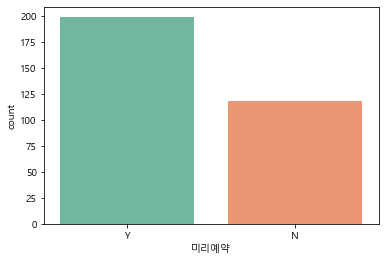

In [9]:
sns.countplot(x='미리예약', data=df, palette='Set2', order = df['미리예약'].value_counts().index)
plt.show()

- 상품

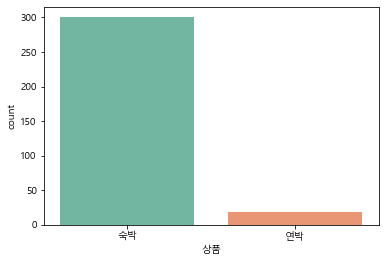

In [10]:
sns.countplot(x='상품', data=df, palette='Set2', order = df['상품'].value_counts().index)
plt.show()

- 회원구분

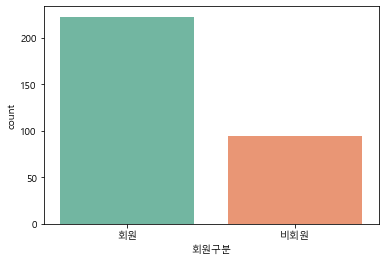

In [11]:
sns.countplot(x='회원구분', data=df, palette='Set2', order = df['회원구분'].value_counts().index)
plt.show()

- 결제수단

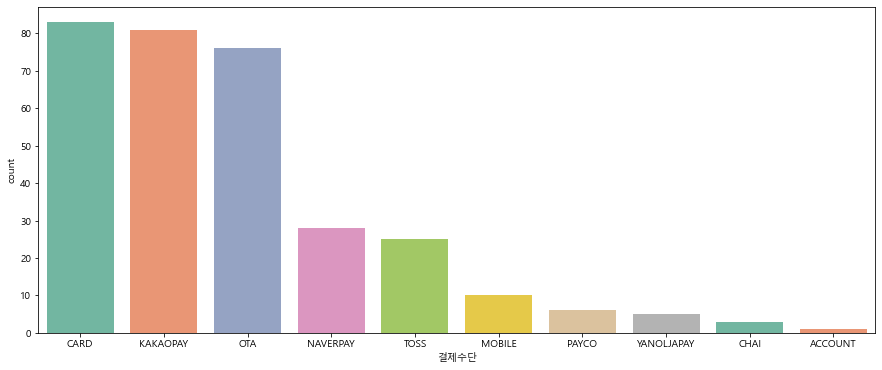

In [12]:
plt.figure(figsize=(15,6))
sns.countplot(x='결제수단', data=df, palette='Set2', order = df['결제수단'].value_counts().index)
plt.show()

- 상태

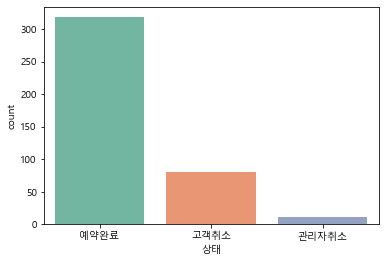

In [13]:
sns.countplot(x='상태', data=data, palette='Set2', order = data['상태'].value_counts().index)
plt.show()

- 유입

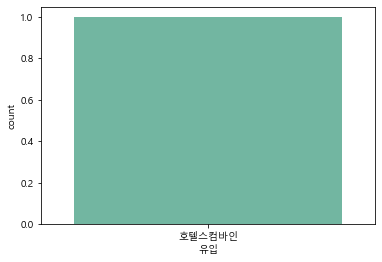

In [14]:
sns.countplot(x='유입', data=df, palette='Set2', order = df['유입'].value_counts().index)
plt.show()

- 경로

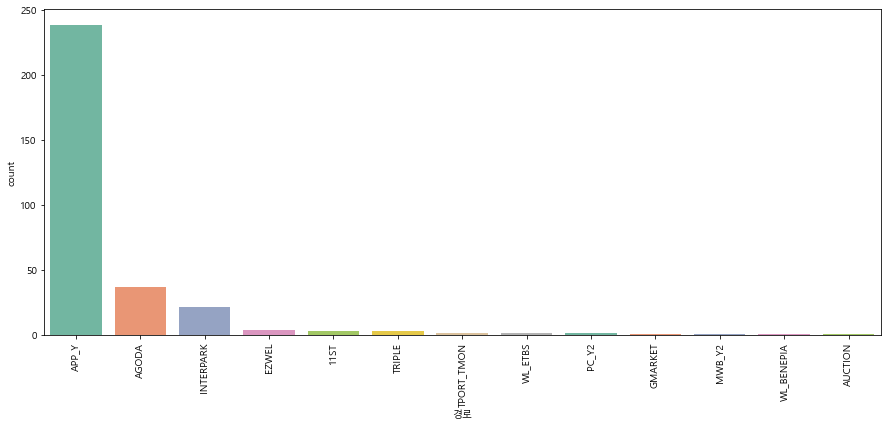

In [15]:
plt.figure(figsize=(15,6))
sns.countplot(x='경로', data=df, palette='Set2', order = df['경로'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

- 쿠폰명

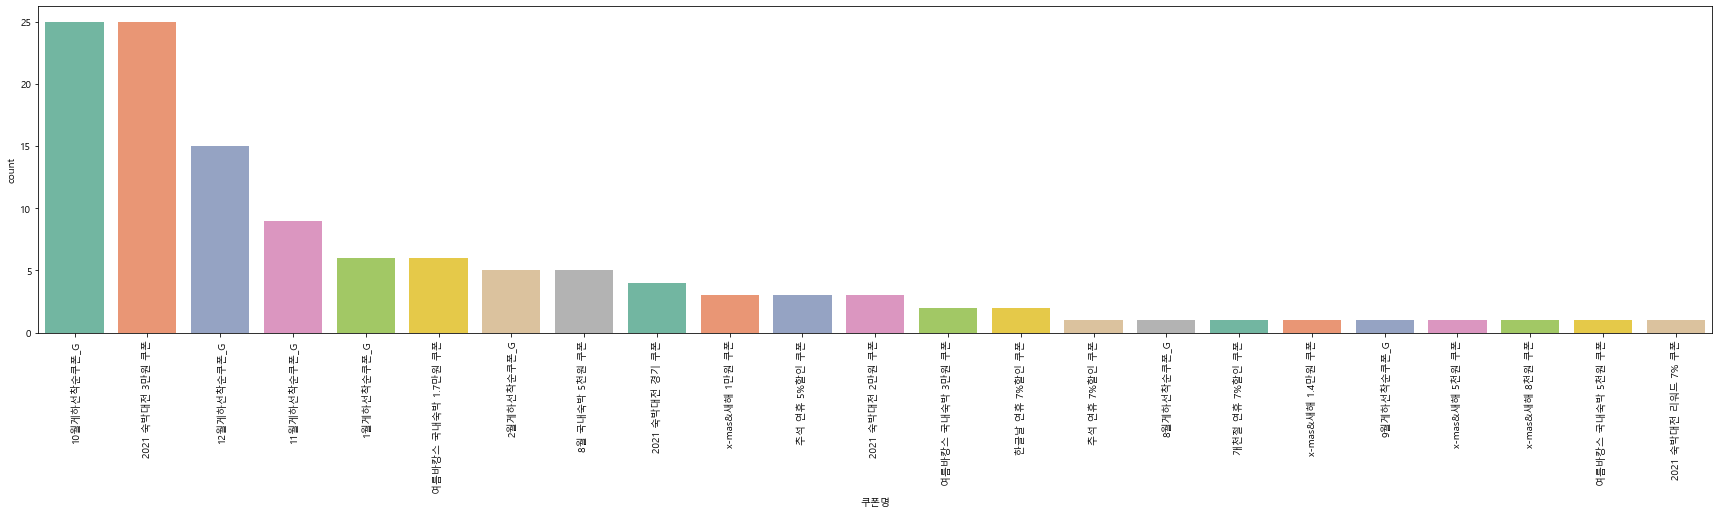

In [16]:
plt.figure(figsize=(30,6))
sns.countplot(x='쿠폰명', data=data, palette='Set2', order = data['쿠폰명'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

# Data Clustering

In [19]:
df_cluster = df.copy()
encoder(df_cluster, 'label')

,미리예약,업체명,상품,객실타입,예약일시,투숙일,퇴실일,회원구분,예약자,핸드폰,...,판매금액,결제금액,쿠폰명,쿠폰금액,포인트금액,제휴사할인금액,상태,유입,경로,customer
0,1,5,0,26,0,0,0,1,164,153,...,300000,295000,-1,0,0,5000,0,-1,2,195
6,1,5,0,26,1,2,2,1,239,29,...,300000,283000,14,17000,0,0,0,-1,2,288
8,1,5,0,26,2,1,1,1,128,40,...,320000,315000,-1,0,0,5000,0,-1,2,152
9,1,5,0,26,3,5,5,1,99,255,...,370000,353000,14,17000,0,0,0,-1,2,115
13,1,5,0,26,4,3,3,1,72,49,...,300000,283000,14,17000,0,0,0,-1,2,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1,7,0,13,144,140,139,1,147,256,...,99000,94000,8,5000,0,0,0,-1,2,172
405,1,1,0,1,145,140,139,1,222,141,...,255000,250000,-1,0,0,5000,0,-1,2,270
407,0,0,0,19,146,140,139,0,156,196,...,150000,150000,-1,0,0,0,0,-1,12,184
408,1,4,0,24,146,141,140,1,181,134,...,99000,94000,8,5000,0,0,0,-1,2,216


- silhouette_score

In [21]:
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(df_cluster)
  labels = kmeans.labels_
  sil.append(silhouette_score(df_cluster, labels, metric = 'euclidean'))

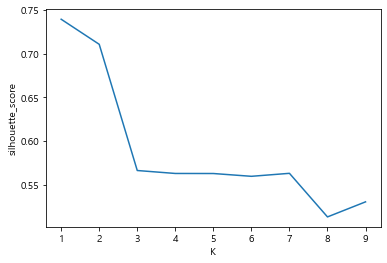

In [22]:
plt.plot(np.arange(1,10),sil)
plt.xlabel('K')
plt.ylabel('silhouette_score')
plt.show()

- WSS

In [25]:
wss=[]
for k in np.arange(1,20):
    km_k = KMeans(n_clusters=k).fit(df_cluster)
    wss.append(km_k.inertia_)

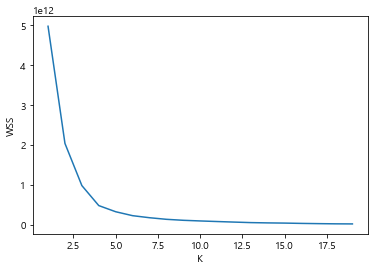

In [26]:
plt.plot(np.arange(1,20),wss)
plt.xlabel('K')
plt.ylabel('WSS')
plt.show()

In [28]:
km = KMeans(n_clusters=2).fit(df_cluster)

df_cluster['cluster_km']=km.labels_
df_cluster['cluster_km']=df_cluster['cluster_km'].astype('category')
df['cluster_km'] = df_cluster['cluster_km']

df_cluster.cluster_km.value_counts()

0    285
1     33
Name: cluster_km, dtype: int64

In [48]:
df['visit'] = df_cluster.groupby(['customer'])[['cluster_km']].transform('count')

In [71]:
df_visit = df[df['visit']>1]
df_visit.sort_values(by=['customer'], axis=0, ascending=False)

# 재방문의 비율은 2:1로 뷰티가 살짝 더 많음
# 최다 재방문 횟수가 2회이지만, 거의 대부분이 같은 호텔에 같은 객실 타입으로 재방문 하는 것을 확인
# 모든 고객이 같은 테마로 재방문을 하는 것 또한 확인

,미리예약,업체명,상품,객실타입,예약일시,투숙일,퇴실일,회원구분,예약자,핸드폰,...,쿠폰명,쿠폰금액,포인트금액,제휴사할인금액,상태,유입,경로,customer,cluster_km,visit
27,N,라까사호텔 서울,숙박,UNBOUNDI West Double(뷰티PKG),2021-08-12,2021-08-12,2021-08-13,비회원,한*준,010****0998,...,NaN,0,0,0,예약완료,NaN,INTERPARK,한*준_0998,0,2
42,N,라까사호텔 서울,숙박,UNBOUNDI West Double(뷰티PKG),2021-08-25,2021-08-25,2021-08-26,비회원,한*준,010****0998,...,NaN,0,0,0,예약완료,NaN,INTERPARK,한*준_0998,0,2
100,Y,호텔 더 리버사이드,숙박,UNBONDI 슈페리어 더블룸(클린뷰티 시즌2 PKG),2021-10-07,2021-10-10,2021-10-11,회원,정*영,010****2427,...,10월게하선착순쿠폰_G,5000,0,0,예약완료,NaN,APP_Y,정*영_2427,0,2
93,N,호텔 더 리버사이드,숙박,UNBONDI 슈페리어 더블룸(클린뷰티 시즌2 PKG),2021-10-03,2021-10-03,2021-10-04,회원,정*영,010****2427,...,10월게하선착순쿠폰_G,5000,0,0,예약완료,NaN,APP_Y,정*영_2427,0,2
46,Y,호텔 코리아나,숙박,UNBOUNDI 스탠다드 패밀리(뷰티PKG),2021-09-02,2021-09-10,2021-09-11,비회원,장*영,010****7506,...,NaN,0,0,0,예약완료,NaN,INTERPARK,장*영_7506,0,2
98,Y,호텔 코리아나,숙박,UNBOUNDI 스탠다드 패밀리(뷰티PKG),2021-10-06,2021-10-09,2021-10-10,비회원,장*영,010****7506,...,NaN,0,0,0,예약완료,NaN,INTERPARK,장*영_7506,0,2
166,N,라까사호텔 광명,숙박,DELUXE WALNUT DOUBLE(UNBOUNDI 힐링선물PKG),2021-11-01,2021-11-01,2021-11-02,회원,임*빈,010****7657,...,NaN,0,0,0,예약완료,NaN,APP_Y,임*빈_7657,0,2
167,N,라까사호텔 광명,연박,DELUXE WALNUT DOUBLE(UNBOUNDI 힐링선물PKG),2021-11-02,2021-11-02,2021-11-04,회원,임*빈,010****7657,...,NaN,0,0,0,예약완료,NaN,APP_Y,임*빈_7657,1,2
86,N,호텔 더 리버사이드,숙박,UNBONDI 슈페리어 더블룸(클린뷰티 시즌2 PKG),2021-10-02,2021-10-01,2021-10-02,회원,이*중,010****2041,...,NaN,0,0,0,예약완료,NaN,APP_Y,이*중_2041,0,2
79,N,호텔 더 리버사이드,숙박,UNBONDI 슈페리어 더블룸(클린뷰티 시즌2 PKG),2021-09-30,2021-09-30,2021-10-01,회원,이*중,010****2041,...,NaN,0,0,0,예약완료,NaN,APP_Y,이*중_2041,0,2


- Cluster 0  
뷰티

In [50]:
df_cluster0 = df[df['cluster_km']==0]
df_cluster0

,미리예약,업체명,상품,객실타입,예약일시,투숙일,퇴실일,회원구분,예약자,핸드폰,...,쿠폰명,쿠폰금액,포인트금액,제휴사할인금액,상태,유입,경로,customer,cluster_km,visit
16,Y,호텔 더 리버사이드,숙박,UNBOUNDI 디럭스더블(뷰티PKG),2021-07-22,2021-08-04,2021-08-05,회원,이*윤,010****1823,...,NaN,0,0,4360,예약완료,NaN,APP_Y,이*윤_1823,0,1
19,Y,호텔 더 리버사이드,숙박,UNBOUNDI 디럭스더블(뷰티PKG),2021-07-29,2021-08-06,2021-08-07,회원,박*현,010****6798,...,여름바캉스 국내숙박 5천원 쿠폰,5000,0,0,예약완료,NaN,APP_Y,박*현_6798,0,1
20,Y,호텔 더 리버사이드,숙박,UNBOUNDI 디럭스더블(뷰티PKG),2021-08-03,2021-08-05,2021-08-06,회원,박*혁,010****1579,...,NaN,0,0,0,예약완료,NaN,APP_Y,박*혁_1579,0,1
22,N,호텔 더 리버사이드,숙박,UNBOUNDI 디럭스더블(뷰티PKG),2021-08-04,2021-08-04,2021-08-05,회원,강*용,010****7569,...,NaN,0,0,0,예약완료,NaN,APP_Y,강*용_7569,0,1
23,Y,호텔 더 리버사이드,숙박,UNBOUNDI 디럭스더블(뷰티PKG),2021-08-06,2021-08-07,2021-08-08,회원,황*훈,010****4992,...,8월 국내숙박 5천원 쿠폰,5000,0,0,예약완료,NaN,APP_Y,황*훈_4992,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,Y,호텔 더 리버사이드,숙박,UNBOUNDI 슈페리어 더블룸(웰니스 티 테이스팅 PKG),2022-02-02,2022-02-02,2022-02-03,회원,장*홍,010****7213,...,2월게하선착순쿠폰_G,5000,0,0,예약완료,NaN,APP_Y,장*홍_7213,0,1
404,Y,호텔 더 리버사이드,숙박,UNBOUNDI 슈페리어 더블룸(웰니스 티 테이스팅 PKG),2022-02-02,2022-02-05,2022-02-06,회원,유*혁,010****9813,...,2월게하선착순쿠폰_G,5000,0,0,예약완료,NaN,APP_Y,유*혁_9813,0,1
407,N,광안리 스튜디오202,숙박,UNBOUNDI 스탠다드A(힐링뷰티 PKG),2022-02-05,2022-02-05,2022-02-06,비회원,이*민,010****6932,...,NaN,0,0,0,예약완료,NaN,WL_ETBS,이*민_6932,0,1
408,Y,서귀포 일레인 호텔,숙박,언바운디 디럭스 킹(UNBOUNDI 웰니스 오감테라피PKG),2022-02-05,2022-02-06,2022-02-07,회원,이*현,010****4908,...,2월게하선착순쿠폰_G,5000,0,0,예약완료,NaN,APP_Y,이*현_4908,0,1


In [51]:
df_cluster0['업체명'].value_counts()

호텔 더 리버사이드     98
라까사호텔 서울       58
라까사호텔 광명       51
호텔 나인브릭        23
호텔 코리아나        22
부산 스튜디오202     18
광안리 스튜디오202    10
서귀포 일레인 호텔      5
Name: 업체명, dtype: int64

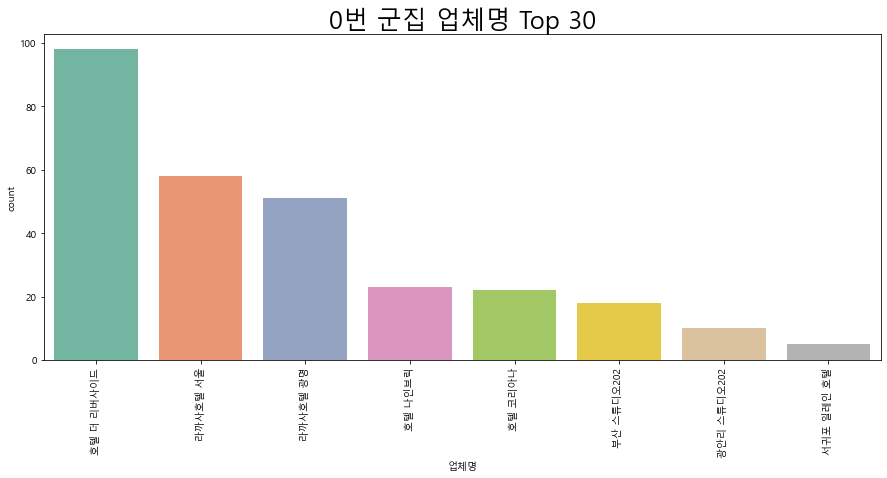

In [56]:
cluster0_top30 = df_cluster0['업체명'].value_counts().keys()[:30]
df0_top30 = df_cluster0.query('업체명 in @cluster0_top30')

plt.figure(figsize=(15,6))
sns.countplot(x='업체명', data=df0_top30, palette='Set2', order=df0_top30['업체명'].value_counts().index)
plt.xticks(rotation=90)
plt.title('0번 군집 업체명 Top 30', fontsize=25)
plt.show()

In [54]:
df_cluster0['객실타입'].value_counts()

UNBOUNDI West Double(뷰티PKG)                58
UNBOUNDI 슈페리어 더블룸(클린뷰티 시즌2 PKG)            27
STANDARD DOUBLE(UNBOUNDI 힐링선물PKG)          21
UNBOUNDI 슈페리어 더블룸(클린뷰티 시즌3 PKG)            19
UNBOUNDI 스탠다드A(프리미엄 뷰티PKG)                 19
UNBOUNDI 디럭스더블(클린뷰티 시즌1 PKG)               17
UNBONDI 슈페리어 더블룸(클린뷰티 시즌2 PKG)             16
UNBOUNDI 디럭스더블(뷰티PKG)                      15
SUPERIOR GREEN DOUBLE(UNBOUNDI 힐링선물PKG)    15
Deluxe Double(UNBOUNDI 클린뷰티PKG)            12
UNBOUNDI 스탠다드 패밀리(뷰티PKG)                   11
Premium Deluxe Double(UNBOUNDI 클린뷰티PKG)    11
DELUXE WALNUT DOUBLE(UNBOUNDI 힐링선물PKG)     11
UNBOUNDI 스탠다드 더블(뷰티PKG)                     7
UNBOUNDI 스탠다드A(힐링뷰티 PKG)                    4
언바운디 디럭스 킹(UNBOUNDI 웰니스 오감테라피PKG)           4
DELUXE TWIN(UNBOUNDI 힐링선물PKG)               4
UNBOUNDI 스탠다드C(프리미엄 뷰티PKG)                  4
UNBOUNDI 슈페리어 더블룸(웰니스 티 테이스팅 PKG)           4
UNBOUNDI 디럭스 더블(뷰티PKG)                      2
UNBOUNDI 디럭스 패밀리(뷰티 PKG)                    2
언바운디 디럭스 트윈(UNBOUNDI 웰니스 오감테라피PKG)

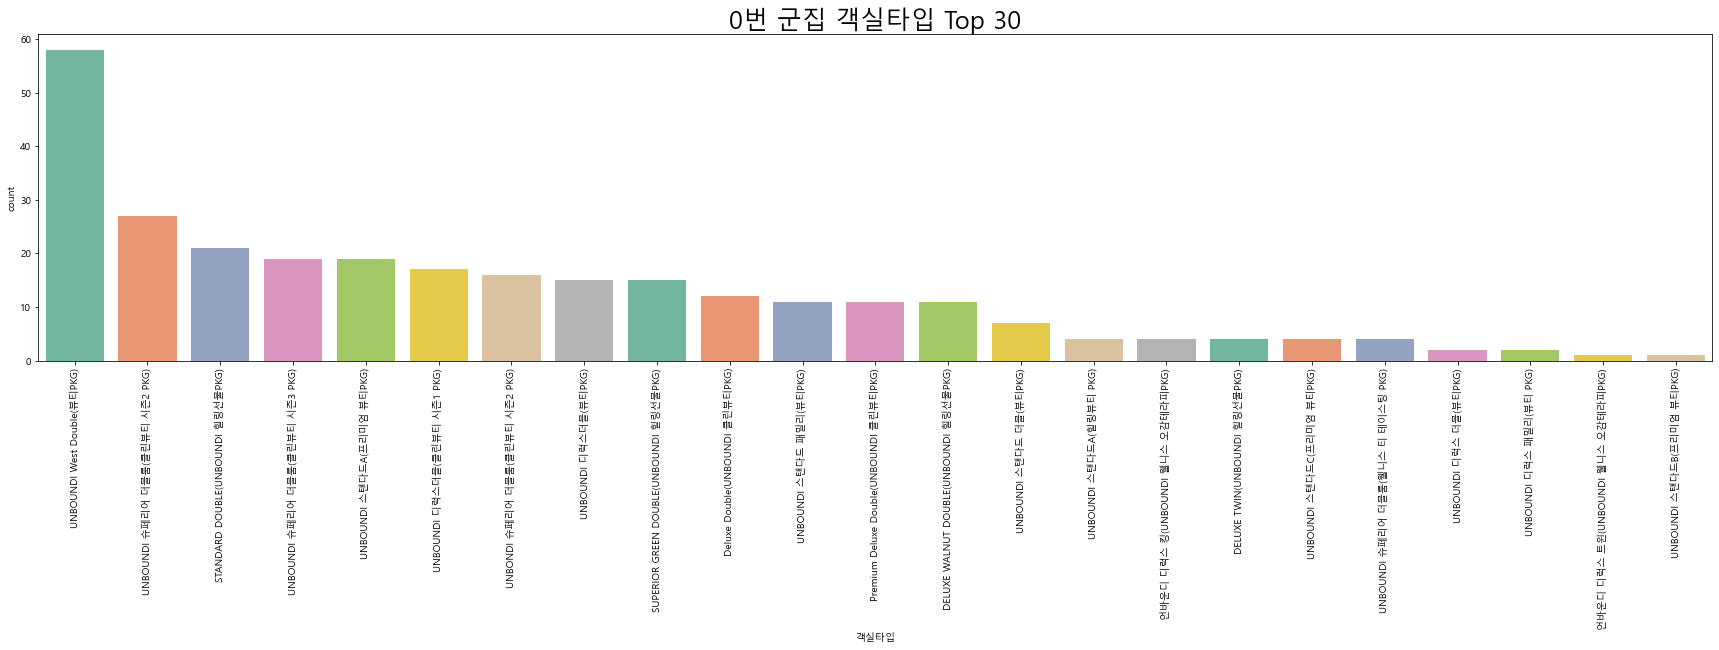

In [55]:
cluster0_top30 = df_cluster0['객실타입'].value_counts().keys()[:30]
df0_top30 = df_cluster0.query('객실타입 in @cluster0_top30')

plt.figure(figsize=(30,6))
sns.countplot(x='객실타입', data=df0_top30, palette='Set2', order=df0_top30['객실타입'].value_counts().index)
plt.xticks(rotation=90)
plt.title('0번 군집 객실타입 Top 30', fontsize=25)
plt.show()

In [57]:
df_cluster0['미리예약'].value_counts(normalize=True)

Y    0.6
N    0.4
Name: 미리예약, dtype: float64

In [58]:
df_cluster0['상품'].value_counts(normalize=True)

숙박    0.968421
연박    0.031579
Name: 상품, dtype: float64

In [69]:
df_cluster0['회원구분'].value_counts(normalize=True)

회원     0.687719
비회원    0.312281
Name: 회원구분, dtype: float64

- Cluster 1  
힐링 - 한옥호텔

In [59]:
df_cluster1 = df[df['cluster_km']==1]
df_cluster1

,미리예약,업체명,상품,객실타입,예약일시,투숙일,퇴실일,회원구분,예약자,핸드폰,...,쿠폰명,쿠폰금액,포인트금액,제휴사할인금액,상태,유입,경로,customer,cluster_km,visit
0,Y,평창 고려궁 한옥호텔,숙박,언바운디(힐링PKG),2021-06-13,2021-06-13,2021-06-14,회원,이*영,010****5503,...,NaN,0,0,5000,예약완료,NaN,APP_Y,이*영_5503,1,1
6,Y,평창 고려궁 한옥호텔,숙박,언바운디(힐링PKG),2021-06-22,2021-07-02,2021-07-03,회원,한*규,010****0911,...,여름바캉스 국내숙박 1.7만원 쿠폰,17000,0,0,예약완료,NaN,APP_Y,한*규_0911,1,1
8,Y,평창 고려궁 한옥호텔,숙박,언바운디(힐링PKG),2021-06-23,2021-06-26,2021-06-27,회원,송*준,010****1299,...,NaN,0,0,5000,예약완료,NaN,APP_Y,송*준_1299,1,1
9,Y,평창 고려궁 한옥호텔,숙박,언바운디(힐링PKG),2021-06-26,2021-07-30,2021-07-31,회원,문*천,010****9746,...,여름바캉스 국내숙박 1.7만원 쿠폰,17000,0,0,예약완료,NaN,APP_Y,문*천_9746,1,1
13,Y,평창 고려궁 한옥호텔,숙박,언바운디(힐링PKG),2021-07-05,2021-07-09,2021-07-10,회원,김*영,010****1816,...,여름바캉스 국내숙박 1.7만원 쿠폰,17000,0,0,예약완료,NaN,APP_Y,김*영_1816,1,1
15,Y,평창 고려궁 한옥호텔,연박,언바운디(힐링PKG),2021-07-09,2021-07-16,2021-07-18,회원,김*방,010****2466,...,여름바캉스 국내숙박 3만원 쿠폰,30000,0,0,예약완료,NaN,APP_Y,김*방_2466,1,1
18,Y,평창 고려궁 한옥호텔,숙박,언바운디(힐링PKG),2021-07-29,2021-08-23,2021-08-24,비회원,곽*원,010****0904,...,NaN,0,0,0,예약완료,NaN,TPORT_TMON,곽*원_0904,1,1
21,Y,평창 고려궁 한옥호텔,숙박,언바운디(힐링PKG),2021-08-04,2021-08-07,2021-08-08,회원,장*준,010****7753,...,NaN,0,0,0,예약완료,NaN,APP_Y,장*준_7753,1,1
44,Y,평창 고려궁 한옥호텔,숙박,언바운디(힐링PKG),2021-08-31,2021-09-18,2021-09-19,회원,홍*영,010****0282,...,추석 연휴 7%할인 쿠폰,20000,0,0,예약완료,NaN,APP_Y,홍*영_0282,1,1
47,Y,평창 고려궁 한옥호텔,숙박,언바운디 PKG(힐링PKG),2021-09-04,2021-10-09,2021-10-10,회원,정*영,010****6067,...,NaN,0,0,0,예약완료,NaN,APP_Y,정*영_6067,1,1


In [60]:
df_cluster1['업체명'].value_counts()

평창 고려궁 한옥호텔    19
라까사호텔 광명        9
호텔 더 리버사이드      2
라까사호텔 서울        1
광안리 스튜디오202     1
호텔 코리아나         1
Name: 업체명, dtype: int64

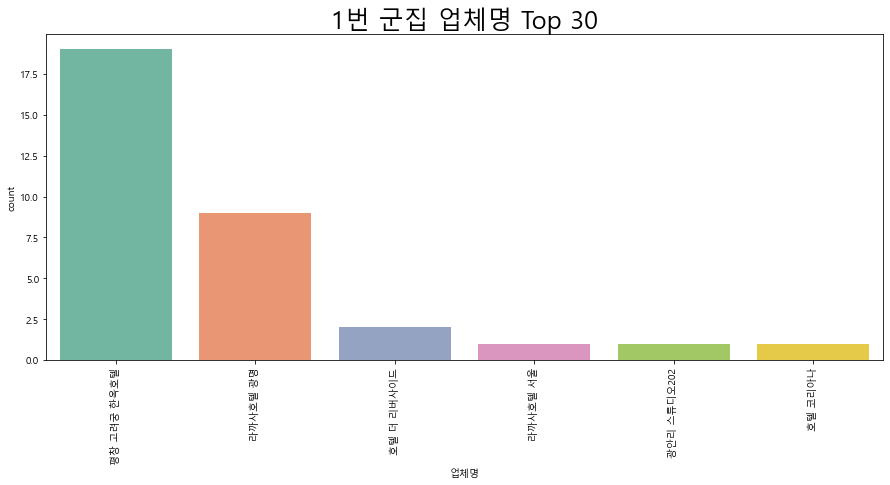

In [62]:
cluster1_top30 = df_cluster1['업체명'].value_counts().keys()[:30]
df1_top30 = df_cluster1.query('업체명 in @cluster1_top30')

plt.figure(figsize=(15,6))
sns.countplot(x='업체명', data=df1_top30, palette='Set2', order=df1_top30['업체명'].value_counts().index)
plt.xticks(rotation=90)
plt.title('1번 군집 업체명 Top 30', fontsize=25)
plt.show()

In [63]:
df_cluster1['객실타입'].value_counts()

언바운디(힐링PKG)                                9
언바운디 PKG(힐링PKG)                            6
UNBOUNDI 인천.한강(언바운디 힐링PKG)                 4
DELUXE WALNUT DOUBLE(UNBOUNDI 힐링선물PKG)     3
UNBOUNDI 디럭스더블(클린뷰티 시즌1 PKG)               2
STANDARD DOUBLE(UNBOUNDI 힐링선물PKG)          2
DELUXE WALNUT DOUBLE(UNBOUNDI 힐링PKG)       2
UNBOUNDI West Double(뷰티PKG)                1
DELUXE TWIN(UNBOUNDI 힐링선물PKG)              1
SUPERIOR GREEN DOUBLE(UNBOUNDI 힐링선물PKG)    1
UNBOUNDI 스탠다드A(프리미엄 뷰티PKG)                 1
UNBOUNDI 디럭스 패밀리(뷰티 PKG)                   1
Name: 객실타입, dtype: int64

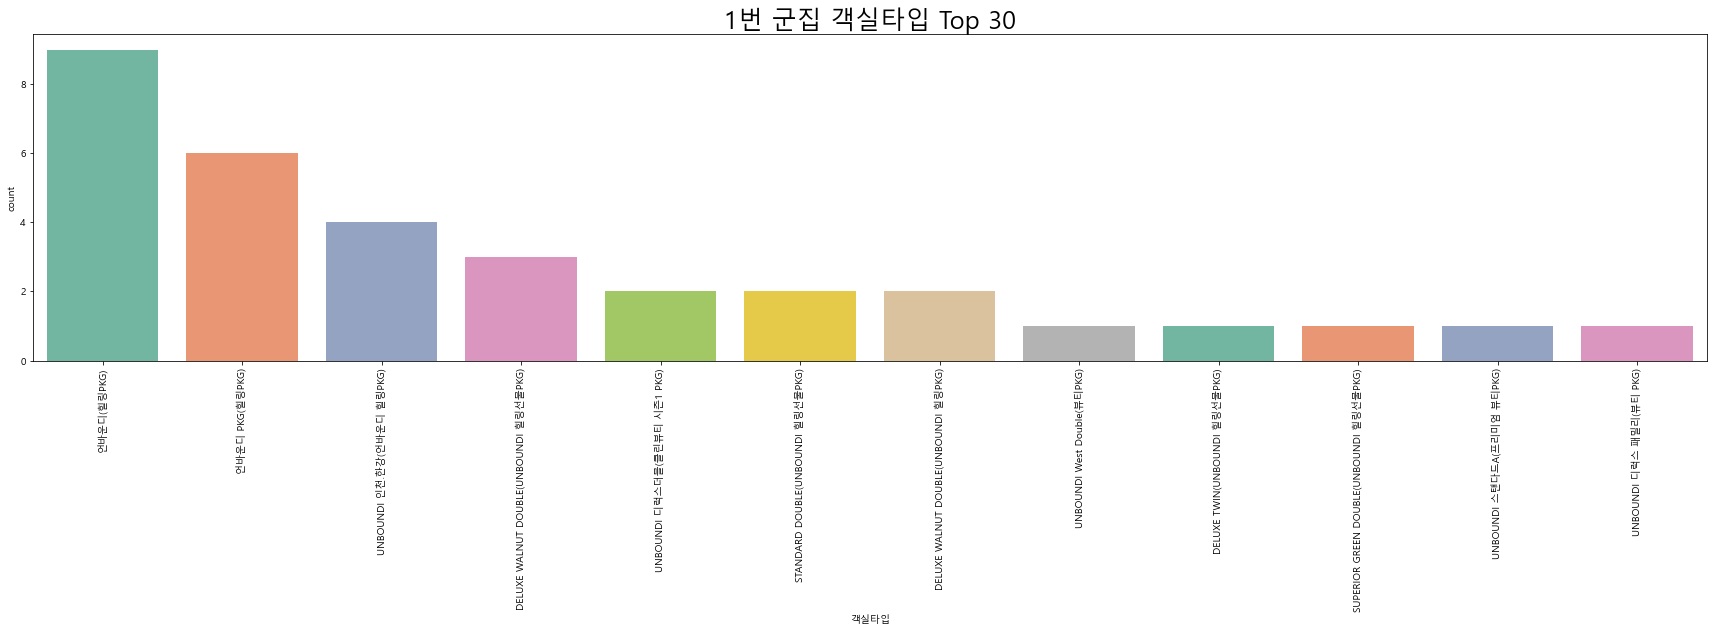

In [64]:
cluster1_top30 = df_cluster1['객실타입'].value_counts().keys()[:30]
df1_top30 = df_cluster1.query('객실타입 in @cluster1_top30')

plt.figure(figsize=(30,6))
sns.countplot(x='객실타입', data=df1_top30, palette='Set2', order=df1_top30['객실타입'].value_counts().index)
plt.xticks(rotation=90)
plt.title('1번 군집 객실타입 Top 30', fontsize=25)
plt.show()

In [65]:
df_cluster1['미리예약'].value_counts(normalize=True)

Y    0.848485
N    0.151515
Name: 미리예약, dtype: float64

In [66]:
df_cluster1['상품'].value_counts(normalize=True)

숙박    0.727273
연박    0.272727
Name: 상품, dtype: float64

In [68]:
df_cluster1['회원구분'].value_counts(normalize=True)

회원     0.818182
비회원    0.181818
Name: 회원구분, dtype: float64